In [1]:
# Notebook for our index of refraction of a gas experiment
# On Google form: sheet 1: air, sheet 2: 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import os

In [3]:
path = '/Users/andrewbowen/OpticsLab/Interferometry/gas/data/'
# dataAir = pd.read_csv(path + 'Gas-Index-Refraction.csv', sep = ',')
lambdaHeNe = 632.99e-7 #wavelength of laser in m


In [13]:
# Defining the functions we'll need; maybe write this up as a class
def cumTotal(df):
    '''Function to sum counts that we have in our dataframe
        returns new dataframe with summed counts column 
        do not use if you did NOT reset between takes'''
    new_counts = []
    c = 0
    new_data = df
    for index,row in df.iterrows():
        c += abs(row['Counts (N)'])
        new_counts.append(c)

    new_data['new counts'] = new_counts
        
    return new_data

def readInFile(path, filename):
    '''Function to read in data file from csv'''
    data = pd.read_csv(path + filename)

    return data

def linModel(x,m,b):
    return m*x + b

def get_n(M):
    '''Function to calculate index of refraction from measured counts (M)'''
    L = 10.0 # length of cylinder (cm)
    n = (M * lambdaHeNe / 8 * L) + 1
    return n

###########################################################################################

def VPplot(filename, gasType):
    '''Function to make Voltage-Pressure plot from endpoints of voltage array'''
    path = '/Users/andrewbowen/OpticsLab/Interferometry/gas/data/'
    data = cumTotal(pd.read_csv(path + filename)) # summing counts, use 'new counts'
    print(data)
    print(' ')
    sumCounts = data['new counts']
    voltage = data['Voltage (V)']
    counts = data['Counts (N)']
    vError = data['V_err (+/-)']
    pressure = np.linspace(0,1,len(voltage))# making pressure value array from endpoints (0atm and 1atm)
    
#     fitting pressure-boltage data
    fitCoeffs, fitCovariance = curve_fit(linModel, pressure, voltage)
    
#     fit params
    bestfit_v = fitCoeffs[0] # slope of V-P plot
    bestfit_b = fitCoeffs[1] # y-int
    
    p = np.arange(0,1,0.01) # input array for plotting model fit
    v = linModel(p, bestfit_v, bestfit_b) # model for our v-p relationship
    
    f,ax = plt.subplots()
    ax.errorbar(pressure, voltage, yerr = vError,fmt = 'o')
    ax.set_xlabel('Pressure (atm)', fontsize = 16)
    ax.set_ylabel('Voltage (V)', fontsize = 16)
    ax.set_title(gasType, fontsize = 16)
    ax.set_ylim(-10,10)
    
    f.savefig(f'../plots/{gasType}-VP-fit.pdf')
    
#     Plotting our model (linear)
    ax.plot(p, v, c = 'r')
    
#     f.savefig(f'./../plots/voltagePressure-{gasType}')

#     Need to calculate and return n
    n = get_n(sumCounts)
    
    return n
    

   Voltage (V)  V_err (+/-)  Counts (N)  new counts
0       -9.710         0.01           0         0.0
1       -8.240         0.01          50        50.0
2       -6.760         0.01          48        98.0
3       -5.350         0.01          45       143.0
4       -3.890         0.01          49       192.0
5       -2.470         0.01          48       240.0
6       -0.948         0.01          52       292.0
7        0.026         0.01          33       325.0
 
1.0132532281250002


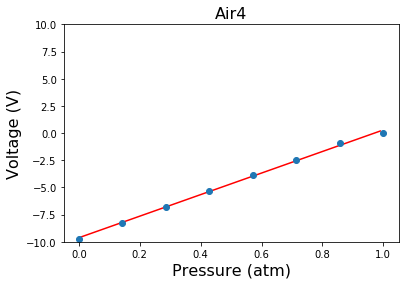

In [15]:
# Good data run
xx = VPplot('Gas-Index-Refraction-Air4.csv', 'Air4')

print(np.mean(xx))

# He Test:

   Counts (N)  Voltage (V)  V_err (+/-)  new counts
0           0       -9.610        0.001         0.0
1       99962       -8.140        0.001     99962.0
2       99984       -5.580        0.001    199946.0
3       99993       -3.459        0.001    299939.0
4       99995       -1.686        0.001    399934.0
5       99997       -1.220        0.001    499931.0
6       99996        0.156        0.001    599927.0
 


0     1.000000
1     8.909368
2    16.820477
3    24.732298
4    32.644278
5    40.556415
6    48.468474
Name: new counts, dtype: float64

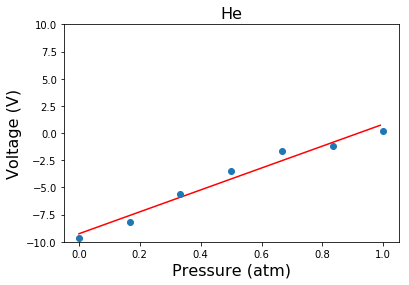

In [6]:
VPplot('Gas-Index-Refraction-He.csv', 'He')

# CO2 Test:

   Counts (N)  Voltage (V)  V_err (+/-)  new counts
0           0        -9.61        0.001         0.0
1       99953        -8.14        0.001     99953.0
2       99910        -6.18        0.001    199863.0
3       99922        -1.08        0.001    299785.0
4       99966         0.02        0.001    399751.0
5       99980         0.47        0.001    499731.0
 


0     1.000000
1     8.908656
2    16.813910
3    24.720113
4    32.629798
5    40.540591
Name: new counts, dtype: float64

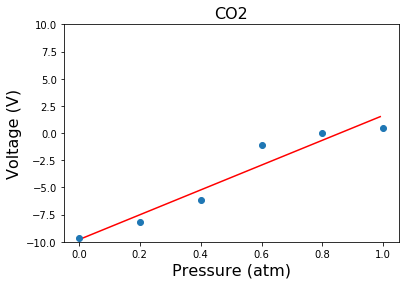

In [7]:
VPplot('Gas-Index-Refraction-CO2.csv', 'CO2')

   Voltage (V)  V_err (+/-)  Counts (N)  new counts
0       -9.690        0.001           0         0.0
1       -8.320        0.001          44        44.0
2       -7.530        0.001          24        68.0
3       -3.120        0.001          85       153.0
4       -1.140        0.001          47       200.0
5       -0.400        0.001          26       226.0
6        0.022        0.001          15       241.0
 


0    1.000000
1    1.003481
2    1.005380
3    1.012106
4    1.015825
5    1.017882
6    1.019069
Name: new counts, dtype: float64

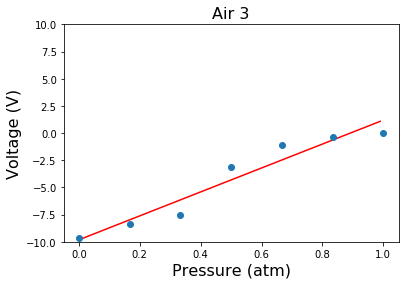

In [8]:
# Air 3
VPplot('Gas-Index-Refraction-Air3.csv', 'Air 3')

   Counts (N)  Voltage (V)  V_err (+/-)  new counts
0           0       -9.610        0.001         0.0
1       99916       -7.180        0.001     99916.0
2       99982       -6.630        0.001    199898.0
3       99989       -1.368        0.001    299887.0
4       99991       -0.759        0.001    399878.0
5       99981        0.005        0.001    499859.0
 


0     1.000000
1     8.905729
2    16.816679
3    24.728184
4    32.639847
5    40.550719
Name: new counts, dtype: float64

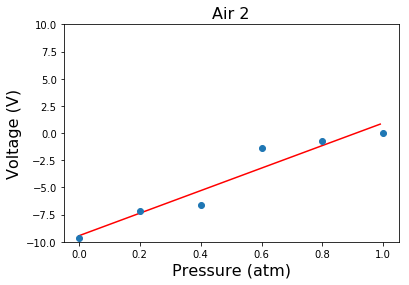

In [9]:
# Air 2
VPplot('Gas-Index-Refraction-Air2.csv', 'Air 2')

In [10]:
# Time series data -- need to show we waited long enough to reach vacuum
time_data = pd.read_csv(path + 'Voltage-Time-Test.csv')

time = time_data['time (s)']
volts = time_data['Voltage (V)']

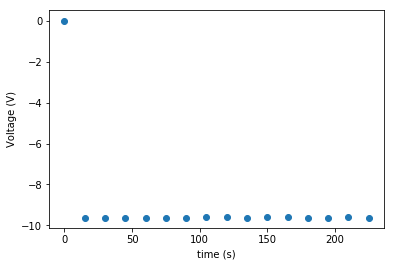

In [11]:
# Plotting time series data to show asymptotic behavior
f, ax = plt.subplots()
ax.scatter(time, volts)
ax.set_xlabel('time (s)')
ax.set_ylabel('Voltage (V)')
f.savefig('./../plots/time-series-gas.pdf')

   Counts (N)  Voltage (V)  V_err (+/-)  new counts
0           0        -9.61        0.001         0.0
1       99953        -8.14        0.001     99953.0
2       99910        -6.18        0.001    199863.0
3       99922        -1.08        0.001    299785.0
4       99966         0.02        0.001    399751.0
5       99980         0.47        0.001    499731.0
 


0     1.000000
1     8.908656
2    16.813910
3    24.720113
4    32.629798
5    40.540591
Name: new counts, dtype: float64

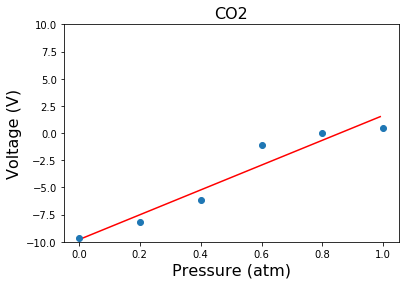

In [12]:
VPplot('Gas-Index-Refraction-CO2.csv', 'CO2')